In [11]:
import sys
from joblib import load
import torch

sys.path.insert(0, '..')
sys.path.insert(0, '../..')
sys.path.insert(0, '../../..')
sys.path.insert(0, '../../../..')
sys.path.insert(0, '../../../../..')
sys.path.insert(0, '../../../../../..')

from reimplemented_approaches.proactive_conformance_checking.data_prep_split_encode import PrefixDataset
from reimplemented_approaches.proactive_conformance_checking.models import LSTMCollectiveIDP
from reimplemented_approaches.proactive_conformance_checking.evaluation import PredictionResults, Metrics

In [12]:
data_dir = "../../data_preparation/Helpdesk/collective/"
path_model = "../../training/Helpdesk/collective/LSTM_collecctive_IDP.pkl"

In [13]:
_, _, test_set = PrefixDataset.load_datasets(save_path=data_dir)

encoders = load(data_dir+"/encoders.pkl")

deviations = encoders.get("deviations")
print(deviations)

["y_('>>', 'Assign seriousness')", "y_('Create SW anomaly', '>>')", "y_('Require upgrade', '>>')", "y_('Resolve ticket', '>>')", "y_('Take in charge ticket', '>>')", "y_('Wait', '>>')"]


In [14]:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device('cpu')
print(f"Evaluating on {device}")

Evaluating on cpu


In [15]:
model = LSTMCollectiveIDP.load(path_model, device=device)

/home/PSPLab/.local/share/virtualenvs/conformance_dev_and_pos_pred-Wn2oNUFZ/lib/python3.12/site-packages/torch/nn/init.py:566: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


In [16]:
pr = PredictionResults(model=model, test_set=test_set)
probs, preds, targets = pr.get_predictions_targets()
# print(preds)
# print(targets)
# print(probs)

In [17]:
m = Metrics(preds=preds, targets=targets)

In [18]:
res_dev = m.macro_precision_recall_dev()
print(res_dev)

{'precision_per_label': array([0.        , 0.        , 0.        , 0.        , 0.5       ,
       0.33333333]), 'recall_per_label': array([0.        , 0.        , 0.        , 0.        , 0.23193916,
       0.01793722]), 'macro_precision': 0.13888888888888887, 'macro_recall': 0.04164606387150676}


In [19]:
res_no_dev = m.macro_precision_recall_no_dev()
print(res_no_dev)

{'precision_per_label_non_deviation': array([0.9980326 , 0.99775155, 0.99100618, 0.96318156, 0.9711181 ,
       0.93824027]), 'recall_per_label_non_deviation': array([1.        , 1.        , 1.        , 1.        , 0.99109879,
       0.9976012 ]), 'macro_precision_non_deviation': 0.9765550443799765, 'macro_recall_non_deviation': 0.9981166647086498}


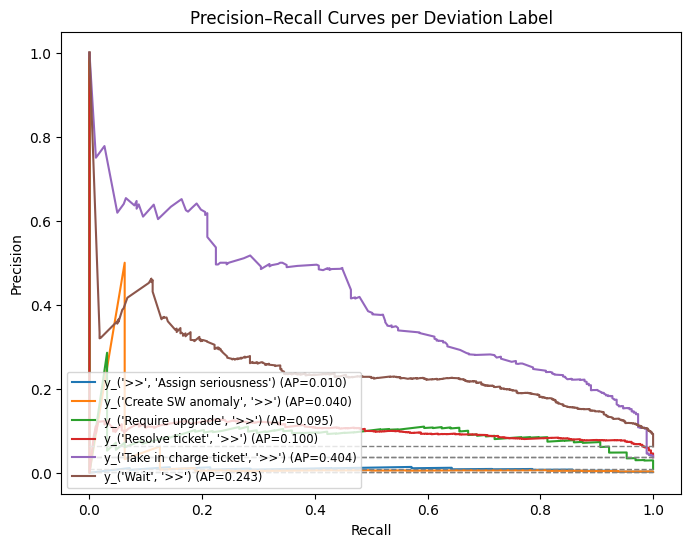

{'per_label_ap': array([0.00996156, 0.04013375, 0.09485518, 0.09981996, 0.40363494,
       0.24314373]), 'macro_ap': 0.1485915169655456}


In [20]:
pr_auc = m.plot_macro_pr_auc(prob_scores=probs, label_names=deviations)
print(pr_auc)